# Logistic Regression

The FBI have a [forensic glass service](https://www.fbi.gov/about-us/lab/forensic-science-communications/fsc/april2009/review/2009_04_review01.htm). They have a large database of the chemical composition of many types of glass, and what the glass was used for.

- 1 building_windows_float_processed 
- 2 building_windows_non_float_processed 
- 3 vehicle_windows_float_processed 
- 4 vehicle_windows_non_float_processed (none in this database) 
- 5 containers 
- 6 tableware 
- 7 headlamps

They analysed these glassware products for their refractive index (ri) and the composition of various elements (Na, Fe, K, etc).

The raw spreadsheet has no column headers, so we have to supply them ourselves

In [2]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')


In [3]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Pretend we are investigating a crime scene, and we want to know what the probability is that some
glass fragments we have found came from a car or vehicle vs some kind of assorted glassware.

Remember that a pandas Series has a method .map() . You can use a function for this, or you can use a dictionary.



In [4]:
# Create a python language dictionary that which has the value 0 for the keys 1,2,3 and 4; and has the 
# value 1 for the keys 5, 6 and 7

dictionary = {1:0,2:0,3:0,4:0,5:1,6:1,7:1}

In [5]:
# Create a new column in the "glass" data frame my calling glass.glass_type.map() with your dictionary as an argument

glass['assorted'] = glass.glass_type.map(dictionary)

In [6]:
# Make sure that this data looks right (e.g. use the head() method and look at it)
glass.tail()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted
id,,,,,,,,,,,
210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7,1
211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7,1
212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7,1
213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7,1
214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7,1


Let's try to predict **assorted** using **al**. Let's visualize the relationship to figure out how to do this:

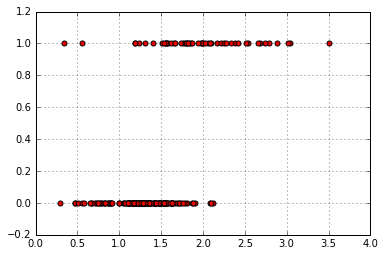

In [7]:
# Do a scatter plot of *al* on the x-axis, and *assorted* on the y-axis.

import matplotlib.pyplot as plt
%matplotlib inline

x=glass.al
y=glass.assorted

plt.figure()
axes = plt.gca()
plt.grid(True)

axes.scatter(x,y, s= 25, c='r')


In [8]:
# create a logistic regression model with incredibly weak regularisation
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

In [9]:
# use logreg to fit the data. You will need an X using the *al* column, and a Y of the *assorted* column

x=glass[['al']]
y=glass.assorted

logreg.fit(x,y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [10]:
# use this regressor to predict from your X data

prediction_from_al_as_x = logreg.predict(x)

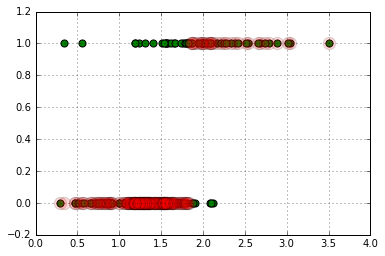

In [11]:
# plot the class predictions on top of the actual data

plt.figure()
axes = plt.gca()
plt.grid(True)

axes.scatter(x,y, s= 50, c='g')
axes.scatter(x,prediction_from_al_as_x, s= 150, c='r', alpha=0.15)

In [12]:
prediction_proba_from_al_as_x = logreg.predict_proba(x)

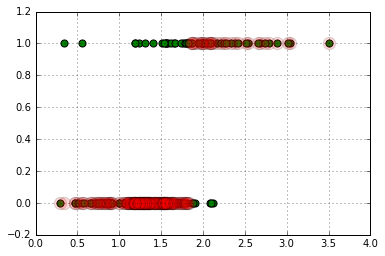

In [13]:
plt.figure()
axes = plt.gca()
plt.grid(True)

axes.scatter(x,y, s= 50, c='g')
axes.scatter(x,prediction_from_al_as_x, s= 150, c='r', alpha=0.15)

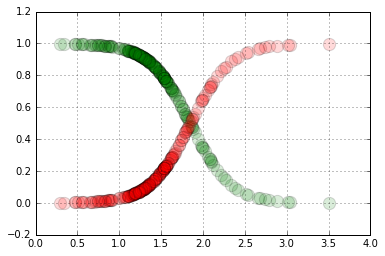

In [14]:
plt.figure()
axes = plt.gca()
plt.grid(True)

axes.scatter(x,prediction_proba_from_al_as_x[:,0], s= 150, c='g', alpha=0.15)
axes.scatter(x,prediction_proba_from_al_as_x[:,1], s= 150, c='r', alpha=0.15)

In [36]:
prediction_proba_from_al_as_x

array([[  9.57512963e-01,   4.24870368e-02],
       [  8.83729869e-01,   1.16270131e-01],
       [  7.81727605e-01,   2.18272395e-01],
       [  9.10590269e-01,   8.94097310e-02],
       [  9.26210406e-01,   7.37895944e-02],
       [  7.19368281e-01,   2.80631719e-01],
       [  9.50165283e-01,   4.98347166e-02],
       [  9.65248419e-01,   3.47515807e-02],
       [  8.79365064e-01,   1.20634936e-01],
       [  8.83729869e-01,   1.16270131e-01],
       [  7.67126168e-01,   2.32873832e-01],
       [  9.17167650e-01,   8.28323504e-02],
       [  8.65415687e-01,   1.34584313e-01],
       [  9.17167650e-01,   8.28323504e-02],
       [  9.03545531e-01,   9.64544686e-02],
       [  9.29017074e-01,   7.09829263e-02],
       [  9.46053995e-01,   5.39460046e-02],
       [  9.81890179e-01,   1.81098214e-02],
       [  9.41624370e-01,   5.83756296e-02],
       [  6.56717894e-01,   3.43282106e-01],
       [  8.15293899e-01,   1.84706101e-01],
       [  9.98500716e-01,   1.49928375e-03],
       [  

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [16]:
# your regressor (logreg) can predict a probability with .predict_proba() - plot the probabilities
# and it should look like a sigmoid curve
# You will probably need to .reshape() or similar in order to get it into a form that you can use

What is this? The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

## Part 2: Probability, odds, e, log, log-odds

If you are interested in the mathematics behind this in more detail, carry on with the following sections.

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

In [17]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9, 0.99]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000
7,0.99,99.000000


What is **e**? It is the base rate of growth shared by all continually growing processes:

In [18]:
# exponential function: e^1
import numpy as np
np.exp(1)

2.7182818284590451

What is a **(natural) log**? It gives you the time needed to reach a certain level of growth:

In [19]:
# time needed to grow 1 unit to 2.718 units
np.log(np.exp(5))

5.0

It is also the **inverse** of the exponential function:

In [20]:
np.log(np.exp(5))

5.0

In [21]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225
7,0.99,99.000000,4.595120


## Part 3: What is Logistic Regression?

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is sometimes written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

Notes:

- **Multinomial logistic regression** is used when there are more than 2 classes.
- Coefficients are estimated using **maximum likelihood estimation**, meaning that we choose parameters that maximize the likelihood of the observed data.

## Part 4: Interpreting Logistic Regression Coefficients

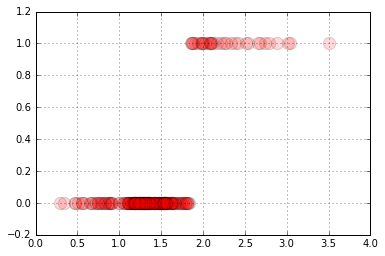

In [22]:
# plot the predicted probabilities again


plt.figure()
axes = plt.gca()
plt.grid(True)

#axes.scatter(x,y, s= 50, c='g')
axes.scatter(x,prediction_from_al_as_x, s= 150, c='r', alpha=0.15)

In [23]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_ * 2
logodds

array([[ 0.64722323]])

In [24]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([[ 1.91022919]])

In [25]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([[ 0.65638445]])

In [26]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)[:, 1]

array([ 0.65638445])

In [27]:
# examine the coefficient for al
zip(logreg.coef_[0])

[(4.1804038614510963,)]

**Interpretation:** A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'assorted'.

In [28]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.99205808391674566

In [29]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(3)[:, 1]

array([ 0.99205808])

**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [30]:
# examine the intercept
logreg.intercept_

array([-7.71358449])

**Interpretation:** For an 'al' value of 0, the log-odds of 'assorted' is -7.71.

In [31]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob



array([ 0.00044652])

That makes sense from the plot above, because the probability of assorted=1 should be very low for such a low 'al' value.

![](images/logistic_betas.png)

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

## Part 5: Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Sensitive to irrelevant features
- Can't automatically learn feature interactions

## Bonus: Confusion Matrix



In [32]:
from sklearn import metrics
prds = logreg.predict(x)
print metrics.confusion_matrix(y, prds)

[[157   6]
 [ 23  28]]


##Top Left: True Negatives <Br>
##Top Right False Negatives <Br>
##Bottom Left: False Negatives <br>
##Bottom Right: True Positives <br>


### Meaning: 
#### Accuracy    = (157 + 28) / 214       == .8644
#### Sensitivity =  28        / (23 + 28) == .5490
#### Specificity =  157       / (157 + 6) == .9631

In [33]:
metrics.confusion_matrix?